In [1]:
pip uninstall tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow


  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30702 sha256=d8d25bfd7d35008f8c35d7b4fcdb64cf1b808ea2476a4e30032d9fa78a73a70a
  Stored in directory: c:\users\doria\appdata\local\pip\cache\wheels\f1\60\77\22b9b5887bd47801796a856f47650d9789c74dc3161a26d608
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=20f9cd4a53fba031e64d7d078c2d5de59a63452a79fedd5ea48da0110b8f1114
  Stored in directory: c:\users\doria\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built clang termcolor
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0


In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test,y_test) = mnist.load_data()

In [4]:
print (type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


<Figure size 432x288 with 0 Axes>

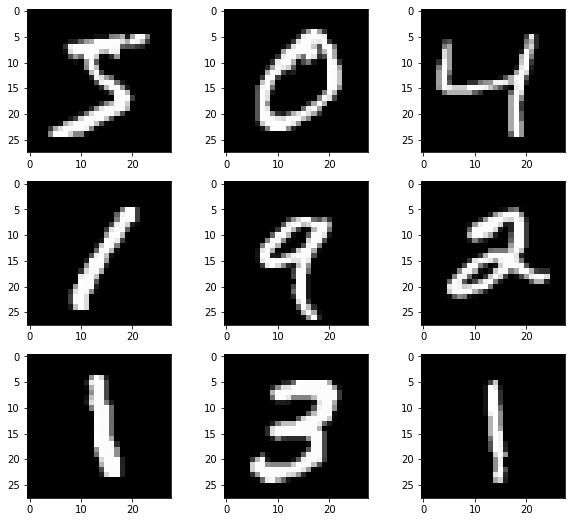

In [6]:
import matplotlib.pyplot as plt
plt.gray()
plt.figure(figsize= (10,9))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])

In [7]:
print (x_train.min())
print(x_train.max())

0
255


In [8]:
# Data Normalization
# Conversion to float
x_train = x_train.astype('float32') 
x_train = x_train/255.0
x_test = x_test.astype('float32')
x_test = x_test/255.0

In [9]:
print (x_train.min())
print(x_train.max())

0.0
1.0


In [10]:
X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [11]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np
total_clusters = len(np.unique(y_test))
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
kmeans.fit(X_train)

C:\Users\doria\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(n_clusters=10)

In [12]:
kmeans.labels_

array([8, 2, 1, ..., 9, 0, 3])

In [13]:
#Find numbers in image 
def find_number(cluster_labels, y_train):
    reference_labels={}
    for i in range(len(np.unique(kmeans.labels_))):
        index = np.where(cluster_labels == i,1,0)
        num = np.bincount(y_train[index==1]).argmax()
        reference_labels[i] = num
    return reference_labels
reference_labels = find_number(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
    number_labels[i] = reference_labels[kmeans.labels_[i]]
print(number_labels[:20].astype('int'))
print(y_train[:20])

[3 0 4 1 7 8 1 3 1 8 3 1 3 6 1 8 4 8 6 1]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [14]:
from sklearn.metrics import accuracy_score
print(accuracy_score(number_labels,y_train))

#49% de réussite, il faut optimiser l'algorithme

0.48373333333333335


In [15]:
def calculate_metrics(model, output):
    print('Number of clustersis {}'.format(model.n_clusters))
    print('Inertia: {}'.format(model.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(output,model.labels_)))

In [16]:
from sklearn import metrics
cluster_number = [10,16,46,64,144,256]
for i in cluster_number:
    total_clusters = len(np.unique(y_test))
    kmeans = MiniBatchKMeans(n_clusters = i)
    kmeans.fit(X_train)
    calculate_metrics(kmeans,y_train)
    reference_labels = find_number(kmeans.labels_,y_train)
    number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
    number_labels[i] = reference_labels[kmeans.labels_[i]]
print('Accuracy score: {}'.format(accuracy_score(number_labels,y_train)))
print('\n')

C:\Users\doria\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Number of clustersis 10
Inertia: 2372274.1997070312
Homogeneity: 0.4594242719609192


C:\Users\doria\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Number of clustersis 16
Inertia: 2270877.823486328
Homogeneity: 0.4965637082699275


C:\Users\doria\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Number of clustersis 46
Inertia: 1896325.5690917969
Homogeneity: 0.7178093957071683


C:\Users\doria\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Number of clustersis 64
Inertia: 1820345.8422851562
Homogeneity: 0.7422781267179754


C:\Users\doria\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Number of clustersis 144
Inertia: 1633435.8015136719
Homogeneity: 0.8025126616289344


C:\Users\doria\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Number of clustersis 256
Inertia: 1515366.4877929688
Homogeneity: 0.8405341619402115
Accuracy score: 0.8995333333333333




In [17]:
# Testing model on Testing set# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = 256)
# Fitting the model to testing set
kmeans.fit(X_test)
# Calculating the metrics
calculate_metrics(kmeans,y_test)
# Calculating the reference_labels
reference_labels = find_number(kmeans.labels_,y_test)
# ‘number_labels’ is a list which denotes the number displayed in image
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)): 
 number_labels[i] = reference_labels[kmeans.labels_[i]]
 
print('Accuracy score : {}'.format(accuracy_score(number_labels,y_test)))
print('\n')

C:\Users\doria\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Number of clustersis 256
Inertia: 248645.91955566406
Homogeneity: 0.8485610555626244
Accuracy score : 0.8896




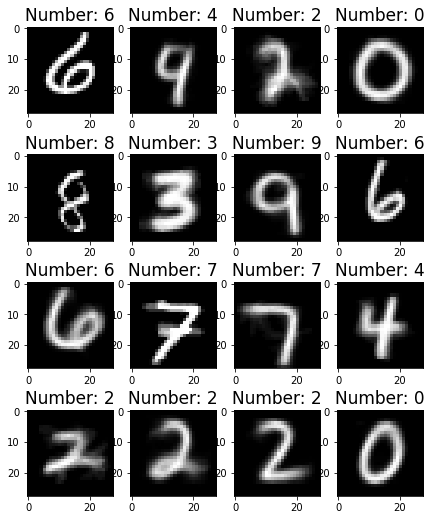

In [18]:
centroids = kmeans.cluster_centers_
centroids = centroids.reshape(256,28,28)
centroids = centroids * 255
plt.figure(figsize = (10,9))
bottom = 0.35
for i in range(16):
    plt.subplots_adjust(bottom)
    plt.subplot(4,4,i+1)
    plt.title('Number: {}'.format(reference_labels[i]), fontsize =17)
    plt.imshow(centroids[i])

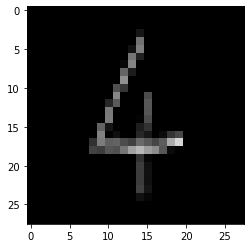

In [123]:
from IPython.display import display
from PIL import Image
path = r'data/number_4.png'
image = plt.imread(path)
plt.imshow(image)

In [124]:
image.shape

(28, 28, 4)

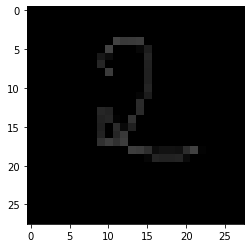

In [118]:
from IPython.display import display
from PIL import Image
path = r'data/number_2.png'
image = plt.imread(path)
plt.imshow(image)

In [119]:
image.shape


(28, 28, 3)

In [120]:
from skimage import color
from skimage import io
image=color.rgb2gray(io.imread(path))

In [121]:
image = image.reshape(1,28*28)
(x_train, y_train), (x_test,y_test) = mnist.load_data()


In [122]:
print(x_train.min())
print(x_train.max())
print(image.min())
print(image.max())

0
255
0.0
0.2588235294117647


In [112]:
x_train = x_train.astype('double')
x_train = x_train/255.0

In [113]:

x_train = x_train.reshape(60000,28*28)

In [114]:

kmeans = MiniBatchKMeans(n_clusters=256)
kmeans.fit(x_train)

C:\Users\doria\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(n_clusters=256)

In [115]:
reference_labels = find_number(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):  
    number_labels[i] = reference_labels[kmeans.labels_[i]]

In [116]:
predicted_cluster = kmeans.predict(image)

In [117]:
number_labels[[predicted_cluster]]

<ipython-input-117-ab09ca053b9a>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  number_labels[[predicted_cluster]]


array([7.])